<a href="https://colab.research.google.com/github/Semillero-de-Neuroinformatica-IA/DeepLearning--with-python/blob/main/Boston_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

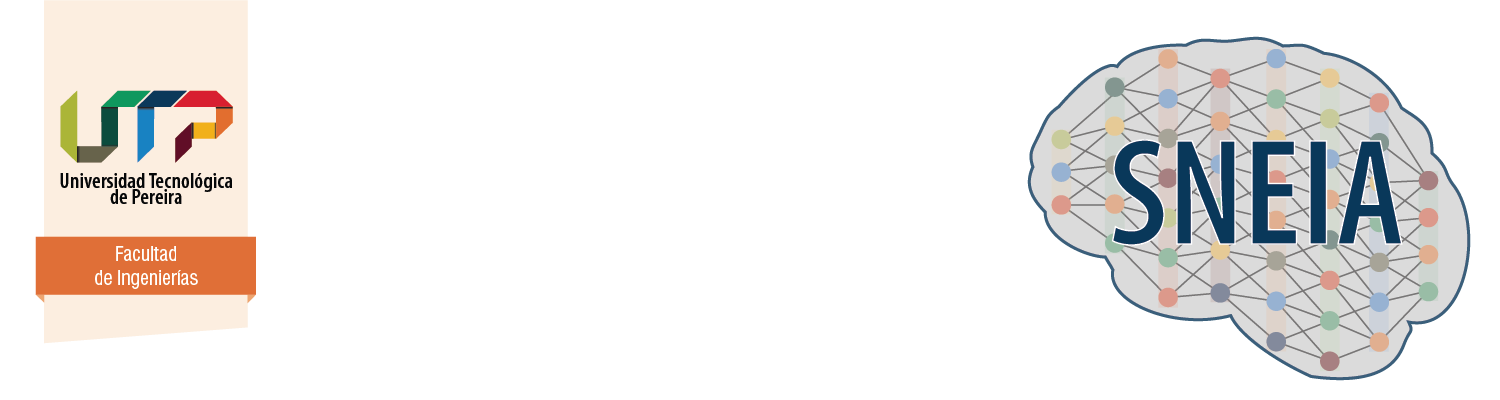

# Regresión: Base de datos de Boston Hosing


Esta base de datos está localizada en el repostorio del curso y puede ser descargada en este [link](https://github.com/Semillero-de-Neuroinformatica-IA/DeepLearning--with-python/blob/main/HousingData.csv.zip). Cabe anotar que esta base de datos viene cargada como ejemplo en la librería Keras, pero por efectos didácticos realizaremos el análisis previo de los datos. El archivo se debe descargar y descomprimir en el disco duro, paso seguido, se debe ejecutar la siguiente celda, y escoger el archivo pulsando el botón "choose file". El archivo estará disponible en nuestra carpeta de trabajo ubicada a la izquierda. Nota: A veces hay que refrescar el navegador.

In [ ]:
 from google.colab import files
data_to_load = files.upload()

Saving HousingData.csv to HousingData.csv


La base de datos contiene 506 muestras (filas) que corresponden a 13 factores categóricos, y el factor 14 (el precio medio de la vivienda) suele ser el target. La figura que se muestra a continuación contiene la descripción de las característcas contenidas en esta base de datos
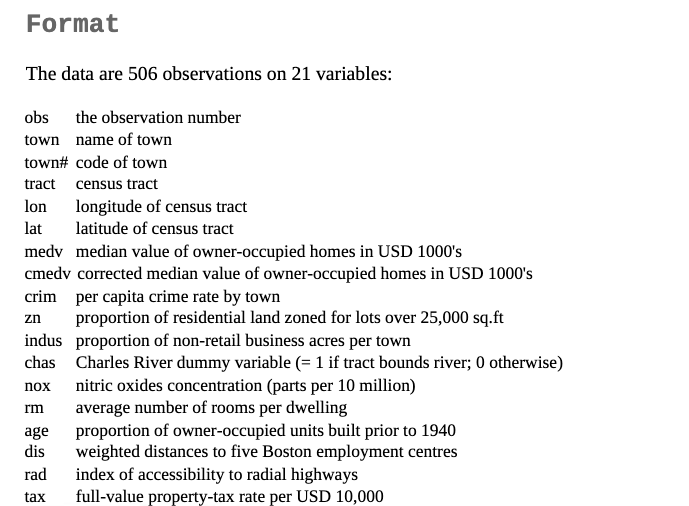


## Librerias que se utilizarán en el ejemplo
Utilizaremos la libería `pandas` para cargar los datos y hacer una breve exploración del contenido. `Numpy`para realizar opeaciones numéricas sobre los datos. Además utilizaremos `Tensorflow` para la construcción de nuestros modelos de red neuronal.

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf

## Carga y preprocesamiento de los datos
Después de cargar los datos vamos a ver el encabezado del marco de datos para darnos una visión global de los datos.

In [ ]:
df = pd.read_csv('HousingData.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


Una buena práctica es hacer una breve descrición estadística de estos mediante el comando `df.desribe()`. 

In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### Remoción de los datos faltantes
El hecho de que exista una diferencia entre el estadístico conteo para las diferentes característica indica que existen datos faltantes o que no son numeros `NaN`. Para eliminar los datos tipo `NaN` utilizamos la función `df.dropna()`.

In [ ]:
print(f'la cantidad de datos inicialmente es {df.shape}')
df = df.dropna()
print(f'La cantidad de datos después de haber retirados los NaN es {df.shape}')

la cantidad de datos inicialmente es (506, 14)
La cantidad de datos después de haber retirados los NaN es (394, 14)


### Creación de los datos de entrada y los targets
En este paso vamos determinar cuales valores de los datos son nuestras entradas y nuestras salidas. En este caso el valor medio de la vivienda **MEDV** es nuestro target, ya que es esta la variable que queremos predecir con base en los otros índices.

In [ ]:
data =np.array(df.values) 
print(data.shape)
x=data[:,:-1]
y=data[:,-1]
print(x.shape)
print(y.shape)

(394, 14)
(394, 13)
(394,)


Ahora el paso a continuación es normalizar los datos, es decir, hacer que la media sea igual a cero y la desviación estandar sea 1

In [ ]:
mean=x.mean(axis=0)
std=x.std(axis=0)
print(mean.shape)
print(std.shape)
x=(x-mean)/std

(13,)
(13,)


Vamos a partir los datos en entrenamiento y validación, dejamos 5 registros para la prueba. Los datos de prueba (Test) nunca se le presentan al modelo en la fase de entrenamiento.

In [ ]:
x_train = x[:-6,:]
y_train = y[:-6]
x_test = x[-6:,:]
y_test = y[-6:]

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(388, 13)
(388,)
(6, 13)
(6,)


## Construcción de la red
La construcción de la red consta de 3 pasos:


1.   Definición de su arquitectura,
2.   Compilación de parámetros para entrenmiento
3.   Entrenamiento de la red

### Definición de la arquitectura
Crearemos un modelo secuencial una capa de entrada de 13 neuronas, una por cada característica de los datos `x_train`. Se añadiran dos capas escondidas, cada una con 6 neuronas y función de activación tipo [relu](https://keras.io/api/layers/activation_layers/relu/). Por último, la capa de salida está compuesta por una neurona cuyo valor corresponderá al valor de **MEDV** predicho por la red.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
    ])

### Compilación del modelo
Para este modelo utilizaremos gradiente descendiente como optimizador, error cuadrático medio como función de perdida y la precisión como métrica.

In [ ]:
model.fit(x_train, y_train, epochs=100, batch_size=1, validation_data=(x_val, y_val), verbose=0)

### Entrenamiento del modelo
Entrenamos la red con nuestros datos, durante 100 epocas. La variable verbose se hace igual a cero, ya que la información que se puede obtener durante el entrenamiento no es relevante. En este caso no se realiza validación en el entrenamiento.

In [ ]:
model.fit(x_train,y_train, epochs=100, verbose=0)

### Cálculo de las predicciones
Utilizaremos los datos que hemos reservado para la prueba y que no fueron utilizados en el entrenamiento, para obtener las predicciones. Visualizaremos los datos predichos junto a los datos objetivos "target". Calcularemos el error cuadrático medio como una medida de la efectividad de nuestra red neuronal.

In [ ]:
y_pred = model.predict(x_test)
for i in range(len(y_pred)):
    print(f'Predicción {y_pred[i]}, Valor real {y_test[i]}')
mse = tf.keras.losses.MeanSquaredError()
print(f'El error cuadrático medio es: {mse(y_test, y_pred).numpy()}')

Podemos observar que nuestro error no es tan bajo como quisieramos, sin embargo se debe tener en cuenta que para hay dos factores que han influido en este resultado:

1.   La poca cantidad de datos
2.   La presencia de datos anómalos en esta.

